In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})
import numpy as np
from datetime import date

In [2]:
from chart_studio.plotly import iplot
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [3]:
## read in data

In [4]:
df = pd.read_excel('ADV_RE_Donors2012-2022.xlsx')

In [5]:
df.columns

Index(['Constituent ID', 'Last Name', 'First Name', 'Organization Name',
       'Birthdate', 'Marital_status', 'Gender', 'Constituent Code',
       'Primary Salutation', 'Designations', 'Loyalty Society ',
       'Pres. Circle', 'Legacy', 'Second Century ', 'Last Gift Amount',
       'Last Gift Date', 'Last Gift Fund', 'Solicit Code', 'Solicit Code_1',
       'Solicit Code_2', 'Solicit Code_3', '01_Volunteer_Type', '01_End_Date',
       '02_Volunteer_Type', '02_End_Date', '03_Volunteer_Type', '03_End_Date',
       'First Gift Date', 'First Gift Amount', 'First Gift Fund',
       'Preferred Email Address', 'Preferred Address Line 1',
       'Preferred Address Line 2', 'Preferred Address Line 3',
       'Preferred Address City', 'Preferred Address State',
       'Preferred Address Zip'],
      dtype='object')

In [6]:
df.shape

(8785, 37)

## look at missing data

In [7]:
# too much missing data on loyalty society, cicle etc

In [8]:
df.isnull().sum()

Constituent ID                 0
Last Name                    815
First Name                   815
Organization Name           7970
Birthdate                   1774
Marital_status              1531
Gender                         0
Constituent Code               0
Primary Salutation             0
Designations                2498
Loyalty Society             8470
Pres. Circle                8700
Legacy                      8488
Second Century              8779
Last Gift Amount             503
Last Gift Date               503
Last Gift Fund               503
Solicit Code                7412
Solicit Code_1              8523
Solicit Code_2              8547
Solicit Code_3              8777
01_Volunteer_Type           8744
01_End_Date                 8767
02_Volunteer_Type           8781
02_End_Date                 8783
03_Volunteer_Type           8785
03_End_Date                 8784
First Gift Date              510
First Gift Amount            510
First Gift Fund              510
Preferred 

In [9]:
print('unique Consitituent id in this dataset are '+ str( len(df['Constituent ID'].unique())))


unique Consitituent id in this dataset are 8785


In [10]:
### create age variable

In [11]:
df['birth_date'] = pd.to_datetime(df.Birthdate)

In [12]:
now = pd.to_datetime('now')

df['age']=(now - df['birth_date']).astype('<m8[Y]') 

In [13]:
alumdf=df.loc[df['Constituent Code']=='Alumni']

In [14]:
# limit data to these

In [15]:
df2=df[['Constituent ID','Constituent Code','Gender','Last Gift Amount','Last Gift Date','First Gift Amount','First Gift Date','Preferred Address State']]

In [16]:
df['firstgiftdate']= pd.to_datetime(df['First Gift Date'])

In [17]:
df['lastgiftdate']= pd.to_datetime(df['Last Gift Date'])

In [18]:
### creating outcome varibles - 0 is only first donation, 1 is first and donations.

In [19]:
df[['firstgiftdate','lastgiftdate']] = df[['firstgiftdate','lastgiftdate']].apply(pd.to_datetime) #if conversion required
df['C'] = (df['lastgiftdate'] - df['firstgiftdate']).dt.days

In [20]:
df['Class'] = df['C'].map(lambda x: 0 if x == 0 else 1)

In [21]:
df.Class.value_counts()

1    6803
0    1982
Name: Class, dtype: int64

In [22]:
df = df.loc[df['lastgiftdate'].notnull()]

In [23]:
df = df.loc[df['firstgiftdate'].notnull()]

In [24]:
df['first_G_year'] = pd.DatetimeIndex(df['firstgiftdate']).year
df['first_G_month'] = pd.DatetimeIndex(df['firstgiftdate']).month

In [25]:
df['year-month'] = [
    pd.datetime(year, month, 1) for year, month in zip(
        df['firstgiftdate'].dt.year, df['firstgiftdate'].dt.month)]

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [26]:
df.groupby(df['first_G_year'])['First Gift Amount'].mean().iplot(kind='bar', colorscale='set2',
                                                 xTitle='Year',
                                                 yTitle='Gift Amount',
                                                 title='Bar plot of average first donation volume by YEAR')

In [27]:
df.groupby(df['first_G_month'])['First Gift Amount'].mean().iplot(kind='bar', colorscale='set2',
                                                 xTitle='Month',
                                                 yTitle='Gift Amount',
                                                 title='Bar plot of average first donation volume by Month')

In [28]:
df['last_G_year'] = pd.DatetimeIndex(df['lastgiftdate']).year
df['last_G_month'] = pd.DatetimeIndex(df['lastgiftdate']).month

In [29]:
df.groupby(df['last_G_year'])['Last Gift Amount'].mean().iplot(kind='bar', colorscale='set2',
                                                 xTitle='Month',
                                                 yTitle='Gift Amount',
                                                 title='Bar plot of average Last donation volume by Year')

In [30]:
df.groupby(df['last_G_month'])['Last Gift Amount'].mean().iplot(kind='bar', colorscale='set2',
                                                 xTitle='Month',
                                                 yTitle='Gift Amount',
                                                 title='Bar plot of average Last donation volume by Month')

In [31]:
s2 = alumdf.groupby("Preferred Address State")["First Gift Amount"].mean().sort_values(ascending = False).head(10)
s2

Preferred Address State
VT    5257.066667
OR    1675.541905
IL    1544.403907
TX    1472.739896
WA    1233.053037
IN    1161.433200
CA    1068.490854
GA    1002.421124
HI     897.226667
OH     860.401793
Name: First Gift Amount, dtype: float64

In [43]:
s1.plot.barh()
plt.xlabel("Average Donations Per state ( in dollars )")
plt.ylabel("States")
plt.axvline(alumdf.groupby("Preferred Address State")["Last Gift Amount"].mean().mean(), color = "blue", linewidth = 2 )
plt.title("Top 10 States that gather donations more than average in last donation")
plt.tight_layout()
plt.margins(0.05)

NameError: name 's1' is not defined

Text(0.5, 0, 'Average Donations Per state ( in dollars )')

Text(0, 0.5, 'States')

Text(0.5, 1.0, 'Top 10 States that gather donations more than average in first donation')

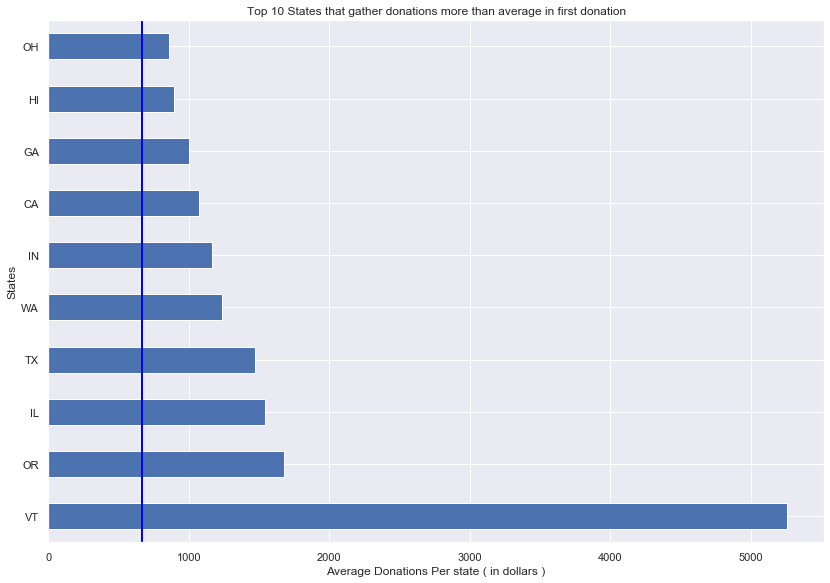

In [44]:
s2.plot.barh()
plt.xlabel("Average Donations Per state ( in dollars )")
plt.ylabel("States")
plt.axvline(alumdf.groupby("Preferred Address State")["First Gift Amount"].mean().mean(), color = "blue", linewidth = 2 )
plt.title("Top 10 States that gather donations more than average in first donation")
plt.tight_layout()
plt.margins(0.05)

In [45]:
s1 = alumdf.groupby("Preferred Address State")["Last Gift Amount"].mean().sort_values(ascending = False).head(10)
s1

Preferred Address State
MT    6733.184800
VT    2316.722000
LA    2271.224182
NV    1651.087407
RI    1418.412609
AZ    1406.595106
MO     960.447143
IL     925.610789
FL     905.767674
GA     851.003136
Name: Last Gift Amount, dtype: float64

[Text(0.5, 1.0, 'Gender among Alumni gifters')]

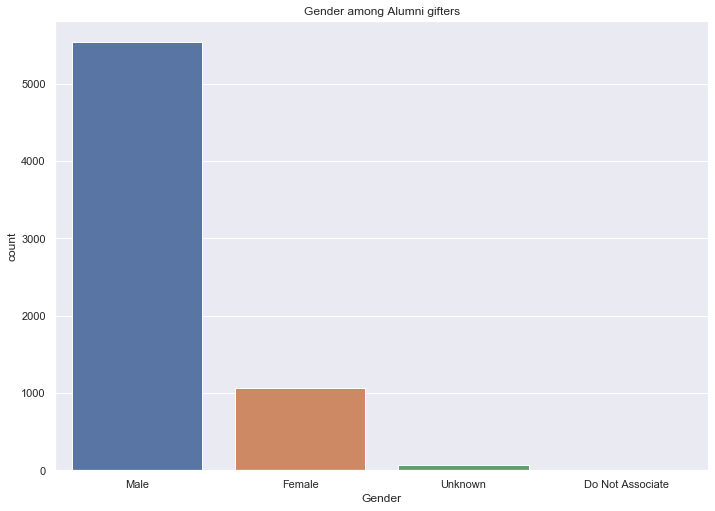

In [46]:
sns.countplot(data=alumdf, x='Gender', order=df.Gender.value_counts().index[:5]).set(title='Gender among Alumni gifters')


In [47]:
a = alumdf.age.dropna()

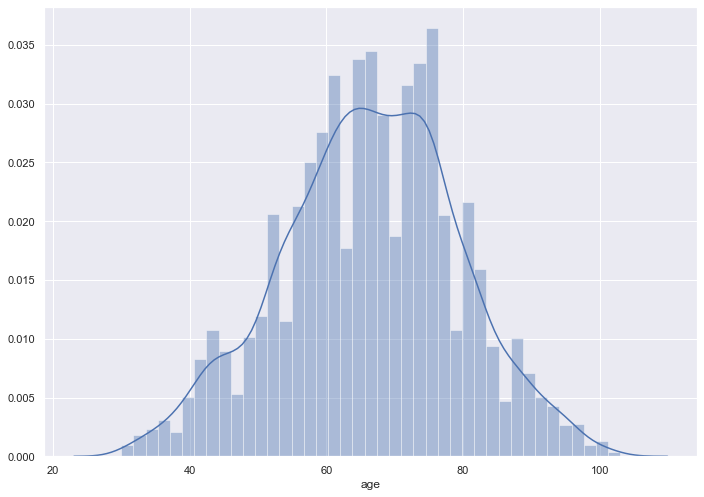

In [48]:
sns.distplot(a)

# descriptives

In [49]:
## add two gifts together

In [50]:
df['totalfund'] = df['Last Gift Amount'] + df['First Gift Amount']

68% of the gifters are male

In [51]:
sns.set(font_scale=2)


[Text(0.5, 1.0, 'Who are gifters')]

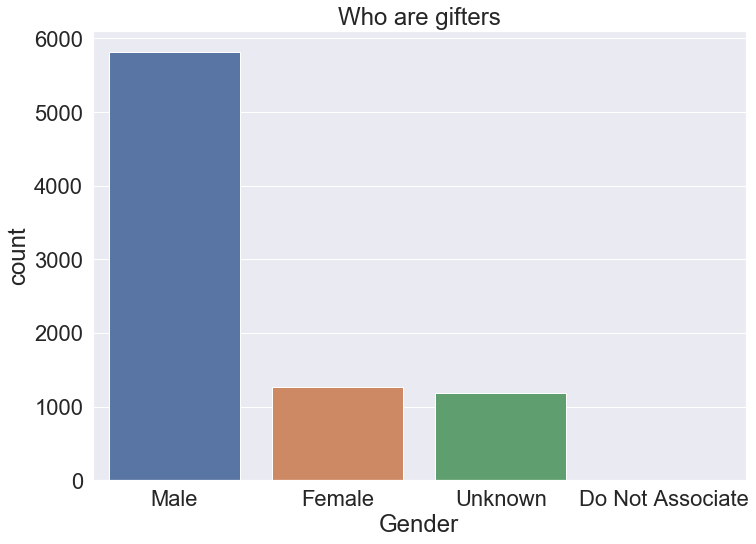

In [52]:
sns.countplot(data=df, x='Gender', order=df.Gender.value_counts().index[:5]).set(title='Who are gifters')


## top designations

[Text(0.5, 1.0, 'Who are gifters by Designations')]

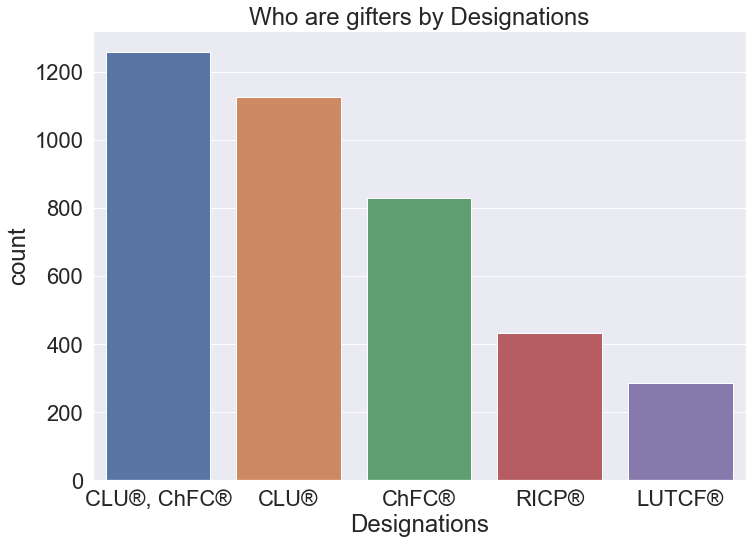

In [53]:
sns.countplot(data=df, x='Designations', order=df['Designations'].value_counts().index[:5]).set(title='Who are gifters by Designations')


 more than 72% of them are from alums

[Text(0.5, 1.0, 'Who are gifters')]

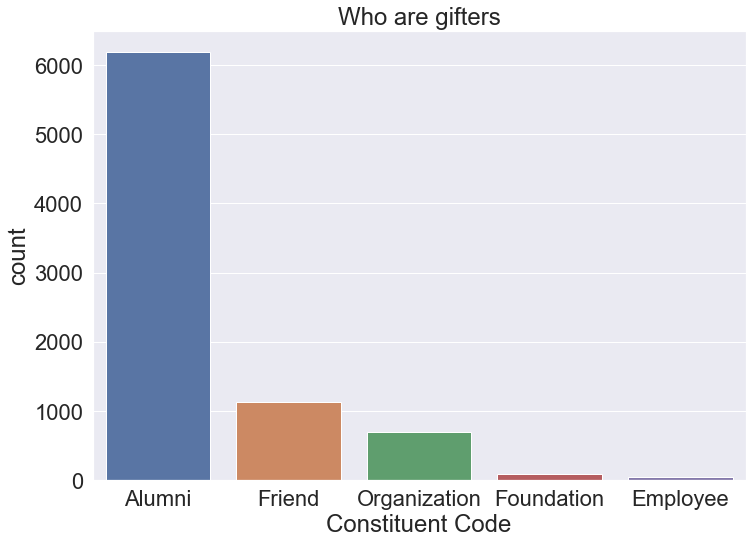

In [54]:
sns.countplot(data=df, x='Constituent Code', order=df['Constituent Code'].value_counts().index[:5]).set(title='Who are gifters')


## most of them are from CA and NYS

[Text(0.5, 1.0, 'Where all gifters come from top 5 states')]

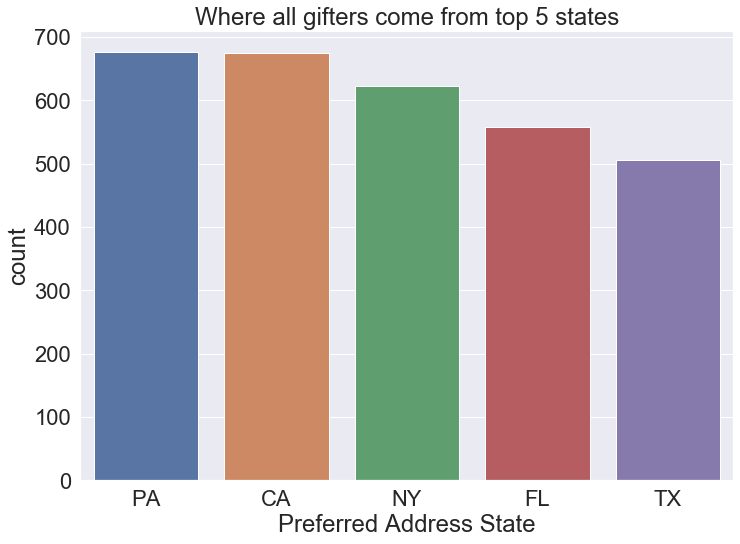

In [55]:
sns.countplot(data=df, x='Preferred Address State', order=df['Preferred Address State'].value_counts().index[:5]).set(title='Where all gifters come from top 5 states')


In [56]:
## age distribution arounnd 66

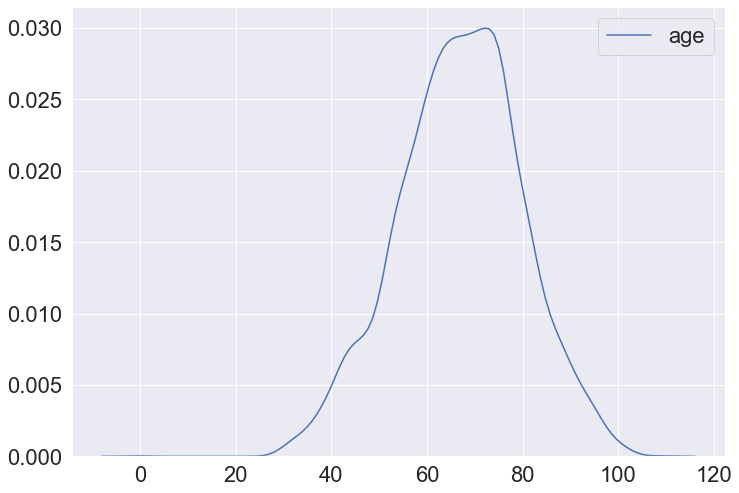

In [57]:
sns.kdeplot(data=df.age)

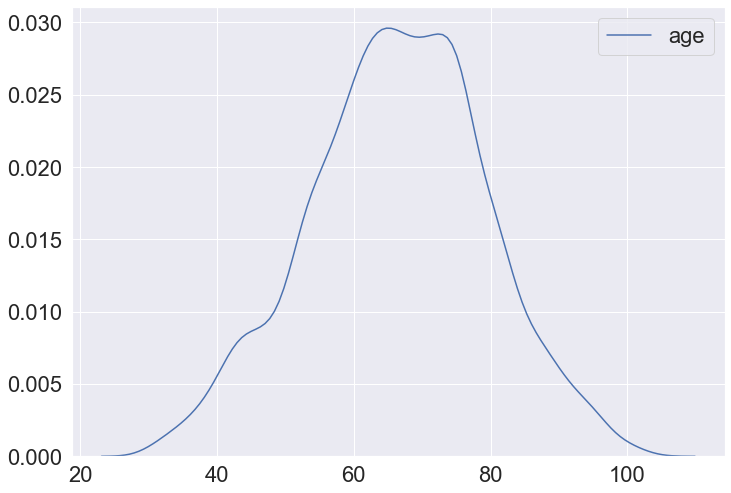

In [58]:
sns.kdeplot(data=alumdf.age)

## top fund by who has designations

In [59]:
dfnew_byorg = df.groupby(['Organization Name'])[['age','totalfund','Last Gift Amount','First Gift Amount']].mean().sort_values(by='totalfund',ascending=False)

In [60]:
df_bydes.sort_values(by = 'totalfund',ascending=False)[:10]


NameError: name 'df_bydes' is not defined

In [61]:
### just look at non-na data

In [62]:
dfnew = df[['Constituent ID','age','Constituent Code','totalfund','Last Gift Amount','First Gift Amount','Preferred Address State']].dropna()

In [63]:
dfnew

,Constituent ID,age,Constituent Code,totalfund,Last Gift Amount,First Gift Amount,Preferred Address State
0,1201588,54.0,Alumni,500.00,250.00,250.00,CA
1,1542264,38.0,Alumni,201.53,98.97,102.56,IL
2,1246873,68.0,Alumni,100.00,50.00,50.00,CA
3,1026996,41.0,Alumni,750.00,375.00,375.00,NY
4,1012902,60.0,Alumni,150.00,100.00,50.00,MD
...,...,...,...,...,...,...,...
7965,1084998,54.0,Alumni,75.00,50.00,25.00,FL
7966,1198036,74.0,Alumni,1350.00,600.00,750.00,CT
7967,1035742,73.0,Alumni,68.00,50.00,18.00,NY
7968,1548758,67.0,Alumni,72.00,36.00,36.00,IN


In [64]:
dfnew.describe()

,Constituent ID,age,totalfund,Last Gift Amount,First Gift Amount
count,6.525000e+03,6525.000000,6525.000000,6525.000000,6525.000000
mean,1.153066e+06,66.903602,1503.728314,768.485543,735.242771
std,1.781181e+05,12.926515,7550.569614,4619.591951,5137.653871
min,1.000010e+05,-1.000000,10.000000,0.000000,0.010000
25%,1.068034e+06,58.000000,125.000000,50.000000,50.000000
50%,1.128361e+06,67.000000,300.000000,100.000000,100.000000
75%,1.188151e+06,76.000000,900.000000,250.000000,500.000000
max,1.629010e+06,109.000000,250623.600000,150225.200000,200000.000000


 first gift ranges from 100(50,500), highest 200k, last gift ranges 100(50,250), highest 150k. total funds ranges from 300(125,900). Donor age ranges from 66(58,75). 

## descriptives by cons code

In [65]:
dfnew_byconcode = df.groupby(['Constituent Code'])[['age','totalfund','Last Gift Amount','First Gift Amount']].mean()

In [66]:
dfnew_byconcode

,age,totalfund,Last Gift Amount,First Gift Amount
Constituent Code,,,,
Alumni,67.313281,1323.137663,657.638579,665.499084
Alumni Council,53.125000,3366.060000,2706.480000,659.580000
Donor Advised Fund,NaN,15654.545455,8463.636364,7190.909091
Employee,52.300000,471.878222,235.271778,236.606444
Former Employee,64.052632,1242.262571,596.713429,645.549143
Former Foundation Board Member,64.000000,1546.260000,46.260000,1500.000000
Former Friend,NaN,466.666667,233.333333,233.333333
Former Trustee,64.375000,9046.673333,4367.086667,4679.586667
Foundation,NaN,103251.782857,48693.740330,54558.042527


In [67]:
dfnew_byorg = df.groupby(['Organization Name'])[['age','totalfund','Last Gift Amount','First Gift Amount']].mean().sort_values(by='totalfund',ascending=False)

In [68]:
dfnew_byorg

,age,totalfund,Last Gift Amount,First Gift Amount
Organization Name,,,,
West Coast Life Ins CO,NaN,4042082.20,2021041.10,2021041.10
Securian Financial Foundation,NaN,2595833.00,370833.00,2225000.00
The Richard J Hartung Charitable Remainder Trust,NaN,2152007.46,1076003.73,1076003.73
The Winston Salem Foundation,NaN,1500750.00,1500000.00,750.00
Mass Mutual Financial Group,NaN,1125125.00,125.00,1125000.00
...,...,...,...,...
Davidson Insurance Services,NaN,40.00,20.00,20.00
McAloon Family Revocable Trust,NaN,35.00,10.00,25.00
Metlife,NaN,22.48,11.60,10.88


## Total gift amount by cons code

In [69]:
byconconde = df.groupby('Constituent Code')['totalfund'].mean().sort_values()

In [70]:
byconconde

Constituent Code
Former Friend                        466.666667
Employee                             471.878222
Former Employee                     1242.262571
Alumni                              1323.137663
Former Foundation Board Member      1546.260000
Friend                              1704.330925
Alumni Council                      3366.060000
Former Trustee                      9046.673333
President's Roundtable Member      11573.863548
Donor Advised Fund                 15654.545455
Organization                       21067.450823
Trustee                            22397.912667
Trustee ex officio                 28625.000000
Foundation                        103251.782857
Name: totalfund, dtype: float64

Text(0.5, 1.0, ' constituent code by total gift amount')

Text(0.5, 0, 'Total Gift Amount')

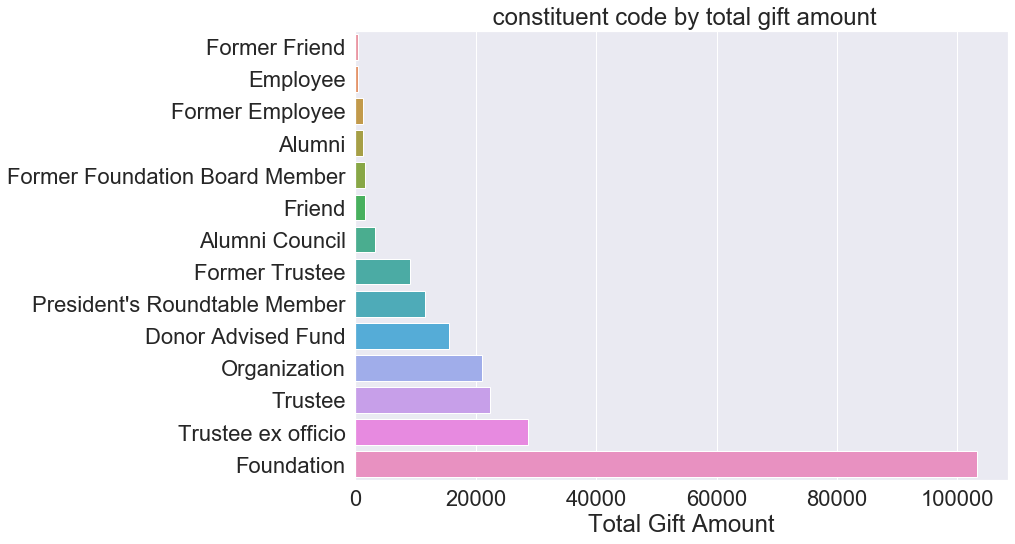

In [71]:
sns.barplot(byconconde, byconconde.index.values)
plt.title(" constituent code by total gift amount")
plt.xlabel("Total Gift Amount")
plt.show()

## TOTAL FUNDS TOP 10 

In [72]:
top10funds = df.sort_values(by='totalfund',ascending=False)[:10]

In [73]:
top10funds

,Constituent ID,Last Name,First Name,Organization Name,Birthdate,Marital_status,Gender,Constituent Code,Primary Salutation,Designations,...,firstgiftdate,lastgiftdate,C,Class,first_G_year,first_G_month,year-month,last_G_year,last_G_month,totalfund
8594,1000424,NaN,NaN,West Coast Life Ins CO,NaT,NaN,Unknown,Organization,West Coast Life Ins CO,NaN,...,2020-09-08,2020-09-08,0.0,0,2020,9,2020-09-01,2020,9,4042082.20
8774,1624904,NaN,NaN,Securian Financial Foundation,NaT,NaN,Unknown,Foundation,Securian Financial Foundation,NaN,...,2022-01-14,2022-02-28,45.0,1,2022,1,2022-01-01,2022,2,2595833.00
8771,1624369,NaN,NaN,The Richard J Hartung Charitable Remainder Trust,NaT,NaN,Unknown,Organization,The Richard J Hartung Charitable Remainder Trust,NaN,...,2021-12-29,2021-12-29,0.0,0,2021,12,2021-12-01,2021,12,2152007.46
8536,1003443,NaN,NaN,The Winston Salem Foundation,NaT,NaN,Unknown,Foundation,The Winston Salem Foundation,NaN,...,2004-07-15,2023-01-20,6763.0,1,2004,7,2004-07-01,2023,1,1500750.00
8609,1000228,NaN,NaN,Mass Mutual Financial Group,NaT,NaN,Unknown,Organization,Mass Mutual Financial Group,NaN,...,2014-08-19,2022-12-27,3052.0,1,2014,8,2014-08-01,2022,12,1125125.00
8729,1607266,NaN,NaN,Truist Foundation,NaT,NaN,Unknown,Foundation,Truist Foundation,NaN,...,2021-08-23,2021-08-31,8.0,1,2021,8,2021-08-01,2021,8,1000000.00
8760,1621909,NaN,NaN,LPL Foundation,NaT,NaN,Unknown,Foundation,LPL Foundation,NaN,...,2021-09-09,2022-12-29,476.0,1,2021,9,2021-09-01,2022,12,750000.00
8492,1000383,NaN,NaN,Sun Life Of Canada,NaT,NaN,Unknown,Organization,Sun Life Of Canada,NaN,...,1964-07-15,2015-12-21,18786.0,1,1964,7,1964-07-01,2015,12,529461.53
8749,1618996,NaN,NaN,Intervivos Foundation,NaT,NaN,Unknown,Foundation,Intervivos Foundation,NaN,...,2021-01-28,2021-01-28,0.0,0,2021,1,2021-01-01,2021,1,400000.00
8764,1623219,NaN,NaN,M Center of Excellence,NaT,NaN,Unknown,Organization,M Center of Excellence,NaN,...,2021-12-21,2022-10-18,301.0,1,2021,12,2021-12-01,2022,10,375000.00


[Text(0.5, 1.0, 'Top 10 funds come which states')]

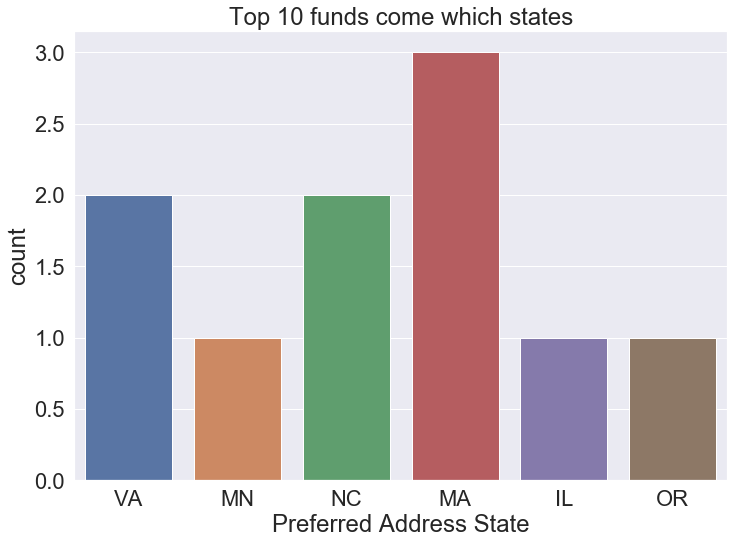

In [74]:
sns.countplot(x=top10funds['Preferred Address State']).set(title='Top 10 funds come which states')


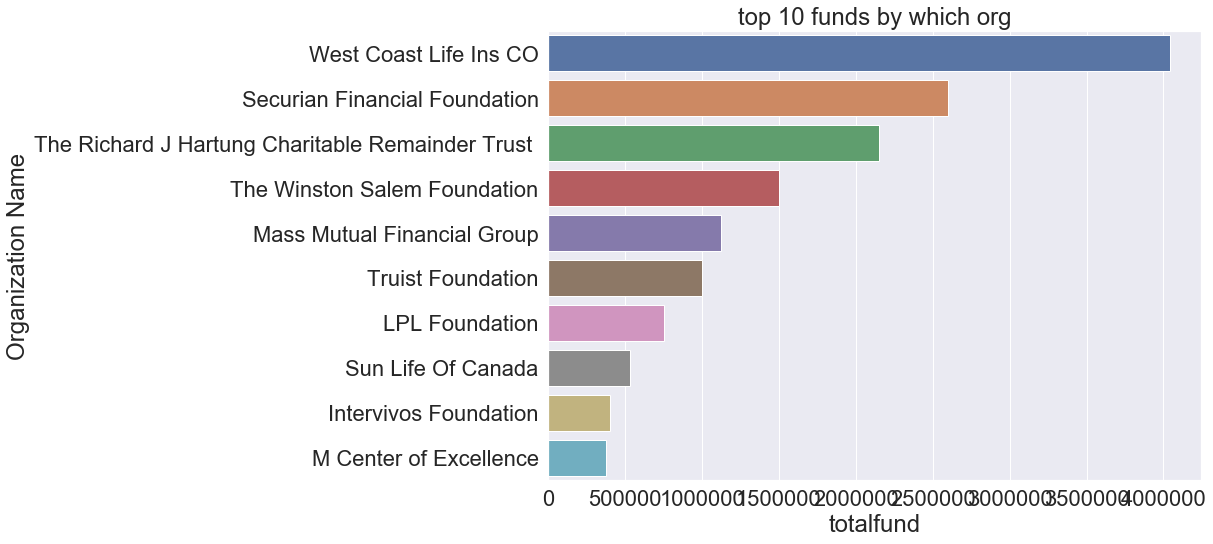

In [75]:
g = sns.barplot(data=top10funds, x="totalfund", y= 'Organization Name').set(title='top 10 funds by which org')


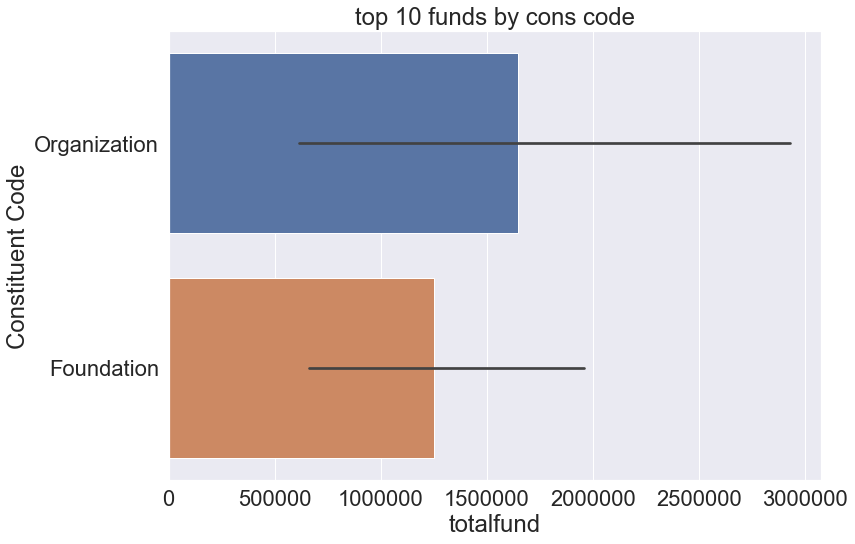

In [76]:
g = sns.barplot(data=top10funds, x="totalfund", y= 'Constituent Code').set(title='top 10 funds by cons code')


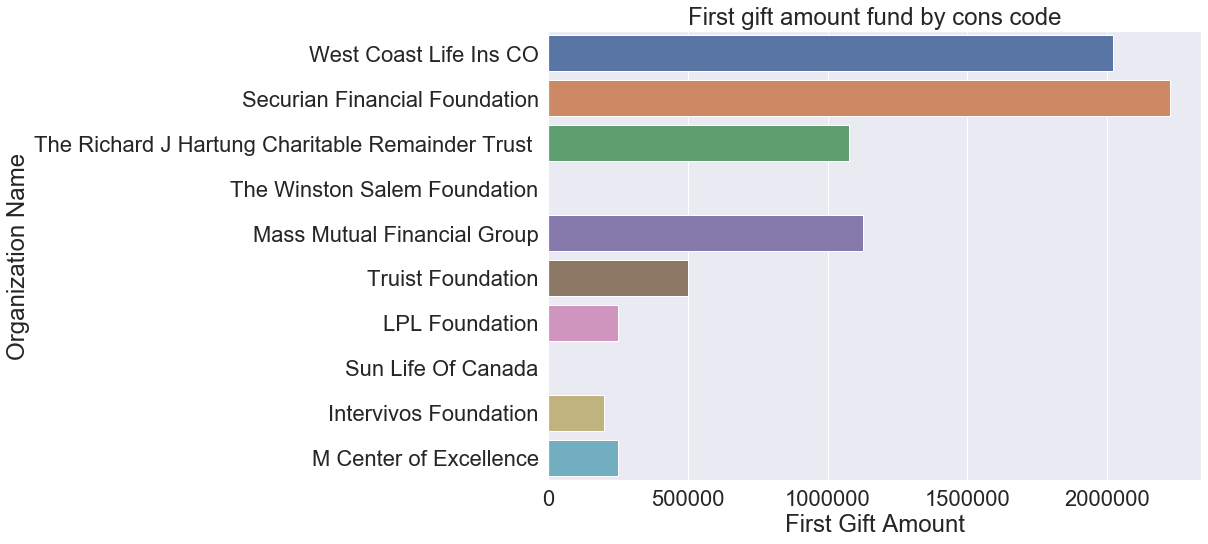

In [77]:
g = sns.barplot(data=top10funds, x="First Gift Amount", y= 'Organization Name').set(title='First gift amount fund by cons code')

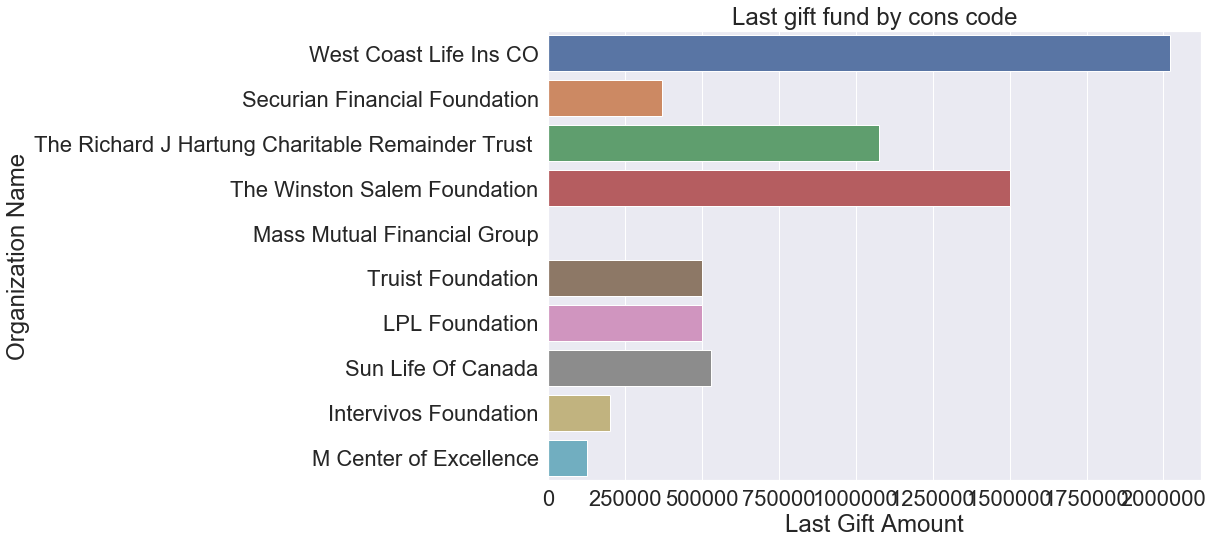

In [78]:
g = sns.barplot(data=top10funds, x="Last Gift Amount", y= 'Organization Name').set(title='Last gift fund by cons code')


### ALUMNI BY DESIGNIATIONS


In [84]:
aldf=alumdf.Designations.value_counts().reset_index().rename(columns= {'index':'desgninations'})

In [85]:
aldf

,desgninations,Designations
0,"CLU®, ChFC®",1269
1,CLU®,1180
2,ChFC®,923
3,RICP®,483
4,LUTCF®,368
...,...,...
278,"RHU®, CLU®, ChHC®",1
279,"LUTCF®, ChFC®, CLU®, CASL®, RICP®",1
280,"LUTCF®, ChFC®, CLF®, CLU®, CASL®, FSCP®",1
281,"CLU®, LUTCF®, ChFC®, CASL®, FSS®",1


###  designations count within alumni cohort

Text(0.5, 1.0, 'Highest Designations of Constituents within Alumni')

Text(0.5, 0, 'Count')

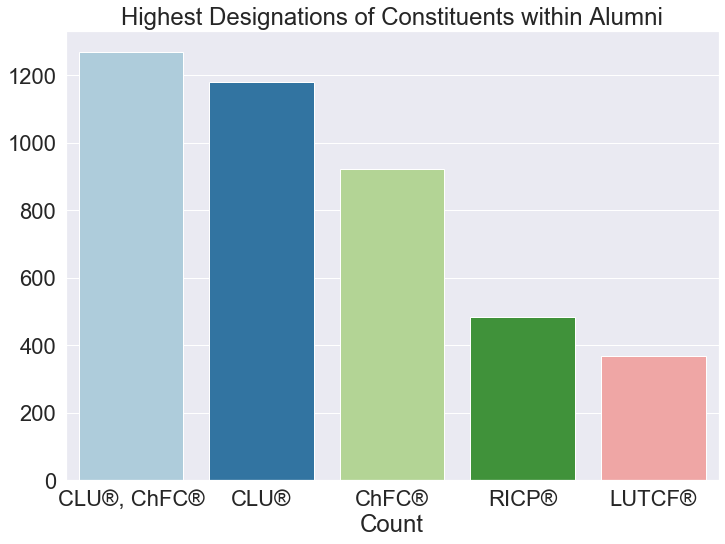

In [95]:
sns.barplot(aldf.desgninations[:5], aldf.Designations.values[:5], palette = "Paired")
plt.title("Highest Designations of Constituents within Alumni")
plt.xlabel("Count")
plt.show()

In [92]:
designa_cnt=df.Designations.value_counts().reset_index().rename(columns= {'index':'desgninations'})

Text(0.5, 1.0, 'Highest Designations of Constituents total sample')

Text(0.5, 0, 'Count')

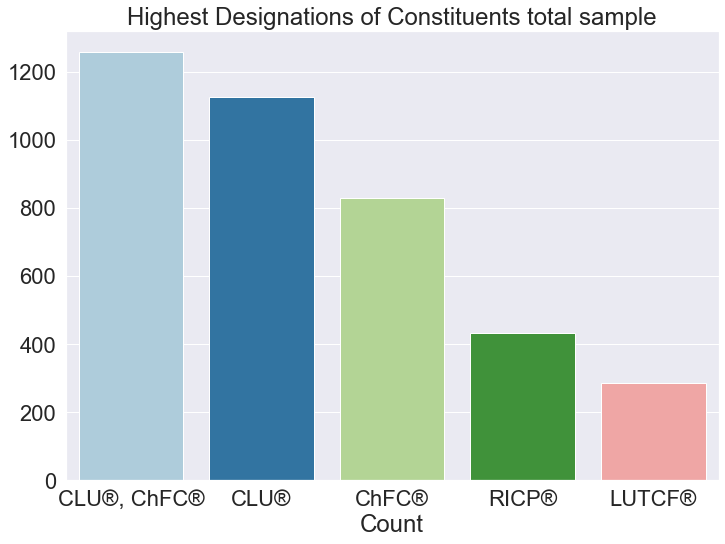

In [96]:
sns.barplot(designa_cnt.desgninations[:5], designa_cnt.Designations.values[:5], palette = "Paired")
plt.title("Highest Designations of Constituents total sample")
plt.xlabel("Count")
plt.show()

## MODELING

In [65]:
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [67]:
df['diffinnamount']= df['Last Git Amount'] - df['First Gift Amount']

In [68]:
df.diffinnamount=df.diffinnamount.astype(int)

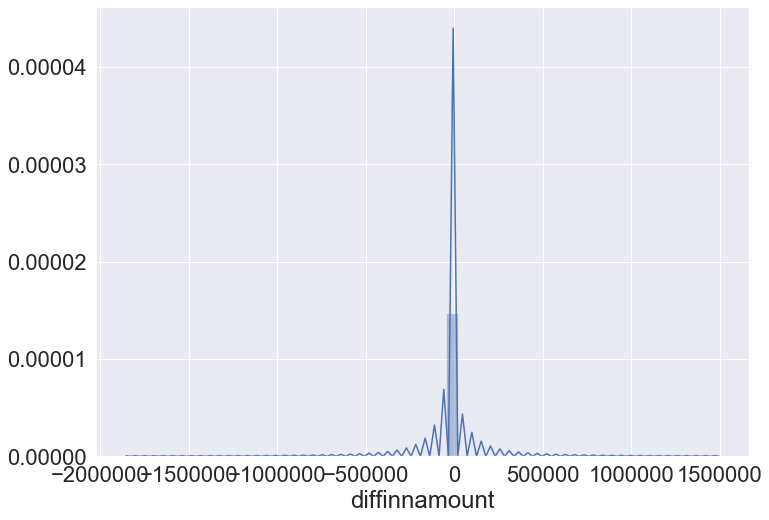

In [69]:
sns.distplot(df.diffinnamount)

In [70]:
df.diffinnamount.mean()

-178.83407909057928

In [100]:
df.Class.value_counts()

1    6287
0    1982
Name: Class, dtype: int64

In [108]:
df.groupby(['Constituent Code','Class']).Gender.count().

Constituent Code                Class
Alumni                          0         947
                                1        5240
Alumni Council                  0           2
                                1          14
Donor Advised Fund              0           3
                                1           8
Employee                        0           9
                                1          36
Former Employee                 0           2
                                1          33
Former Foundation Board Member  1           1
Former Friend                   0           6
Former Trustee                  0           1
                                1          11
Foundation                      0          27
                                1          64
Friend                          0         754
                                1         370
Organization                    0         230
                                1         463
President's Roundtable Member   1         

In [409]:
dfmodel = df[['Constituent Code','Designations','Gender','Preferred Address State','First Gift Amount','Class']]

In [410]:
dfmodel = dfmodel.dropna()

In [411]:
### outcome is if there is last donation or not

In [412]:
x=dfmodel.drop(['Class'],axis=1)
y=dfmodel.Class

In [413]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [414]:
### one hot encode from cat to numeric

In [415]:
categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['Constituent Code', 'Designations', 'Gender', 'Preferred Address State']

In [416]:

encoder = ce.OneHotEncoder(cols=['Constituent Code', 'Designations', 'Gender', 'Preferred Address State'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [417]:
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['Constituent Code_1',
 'Constituent Code_2',
 'Constituent Code_3',
 'Constituent Code_4',
 'Constituent Code_5',
 'Designations_1',
 'Designations_2',
 'Designations_3',
 'Designations_4',
 'Designations_5',
 'Designations_6',
 'Designations_7',
 'Designations_8',
 'Designations_9',
 'Designations_10',
 'Designations_11',
 'Designations_12',
 'Designations_13',
 'Designations_14',
 'Designations_15',
 'Designations_16',
 'Designations_17',
 'Designations_18',
 'Designations_19',
 'Designations_20',
 'Designations_21',
 'Designations_22',
 'Designations_23',
 'Designations_24',
 'Designations_25',
 'Designations_26',
 'Designations_27',
 'Designations_28',
 'Designations_29',
 'Designations_30',
 'Designations_31',
 'Designations_32',
 'Designations_33',
 'Designations_34',
 'Designations_35',
 'Designations_36',
 'Designations_37',
 'Designations_38',
 'Designations_39',
 'Designations_40',
 'Designations_41',
 'Designations_42',
 'Designations_43',
 'Designations_44',
 'Designations

In [418]:
import category_encoders as ce


In [419]:
cols = x_train.columns

In [420]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [421]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

## SGD

In [422]:
from sklearn.linear_model import SGDClassifier

In [423]:
SGD = SGDClassifier(loss='modified_huber',shuffle =True, random_state =123)

In [424]:
sgdmodel = SGD.fit(x_train, y_train)

In [425]:
y_pred = sgdmodel.predict(x_test)
print("sgd Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

sgd Classifier Model Accuracy: 0.8633646456020495


## SVC

In [426]:
#Starting with linear regression
from sklearn.svm import SVC

In [427]:
SVM = SVC(kernel = 'linear',C= 0.0025,random_state = 123)

In [428]:
svmmodel = SVM.fit(x_train, y_train)

In [429]:
svmy_pred = svmmodel.predict(x_test)
print("svc Classifier Model Accuracy:", accuracy_score(y_test, svmy_pred))

svc Classifier Model Accuracy: 0.8684884713919727


## AdaBoostClassifier

In [430]:
adboostmodel = AdaBoostClassifier(n_estimators=3)

# Train Adaboost Classifer
adboostmodel.fit(x_train, y_train)

#Predict the response for test dataset
ady_pred = adboostmodel.predict(x_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, ady_pred))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=3, random_state=None)

AdaBoost Classifier Model Accuracy: 0.8684884713919727


## RF classifier

In [431]:
from sklearn.ensemble import  RandomForestClassifier

In [432]:
RFmodel = RandomForestClassifier()

RFmodel.fit(x_train, y_train)

rfy_pred = RFmodel.predict(x_test)
print("RF Classifier Model Accuracy:", accuracy_score(y_test, rfy_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RF Classifier Model Accuracy: 0.8676345004269855


In [470]:

feature_scores = pd.Series(RFmodel.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores[:5]

First Gift Amount    0.466542
Designations_1       0.019043
Designations_3       0.017825
Designations_2       0.016698
Designations_9       0.015763
dtype: float64

In [440]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RFmodel, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.8482906  0.85470085 0.85042735 0.86324786 0.87393162 0.83974359
 0.8482906  0.87393162 0.88247863 0.87606838]

Average cross-validation score: 0.8611


Text(0.5, 0, 'Con code')

Text(0, 0.5, ' Count')

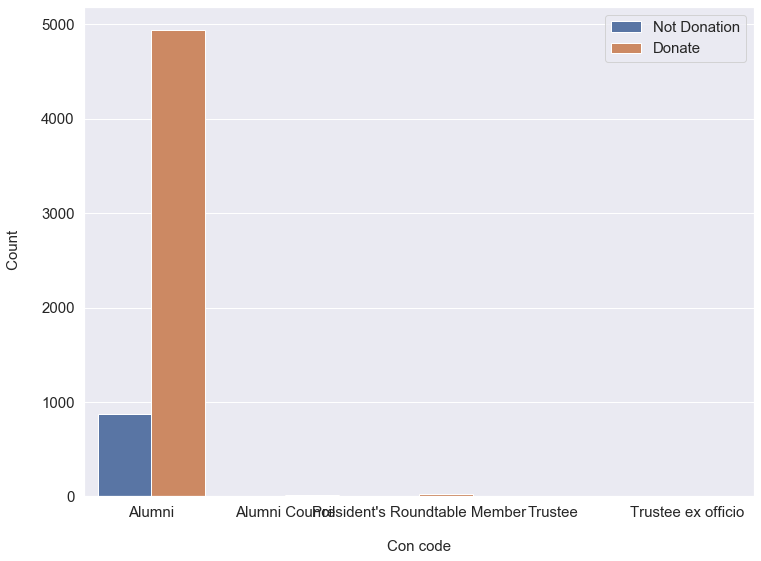

In [463]:

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Constituent Code', hue='Class', data=dfmodel)

plt.xlabel('Con code', size=15, labelpad=20)
plt.ylabel(' Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Donation', 'Donate'], loc='upper right', prop={'size': 15})

plt.show()

Text(0.5, 1.0, 'Visualize feature scores of the features')

[Text(0, 0, "('First Gift Amount',)"),
 Text(0, 0, "('Designations_1',)"),
 Text(0, 0, "('Designations_3',)"),
 Text(0, 0, "('Designations_2',)"),
 Text(0, 0, "('Designations_9',)")]

Text(0.5, 0, 'Feature importance score')

Text(0, 0.5, 'Features')

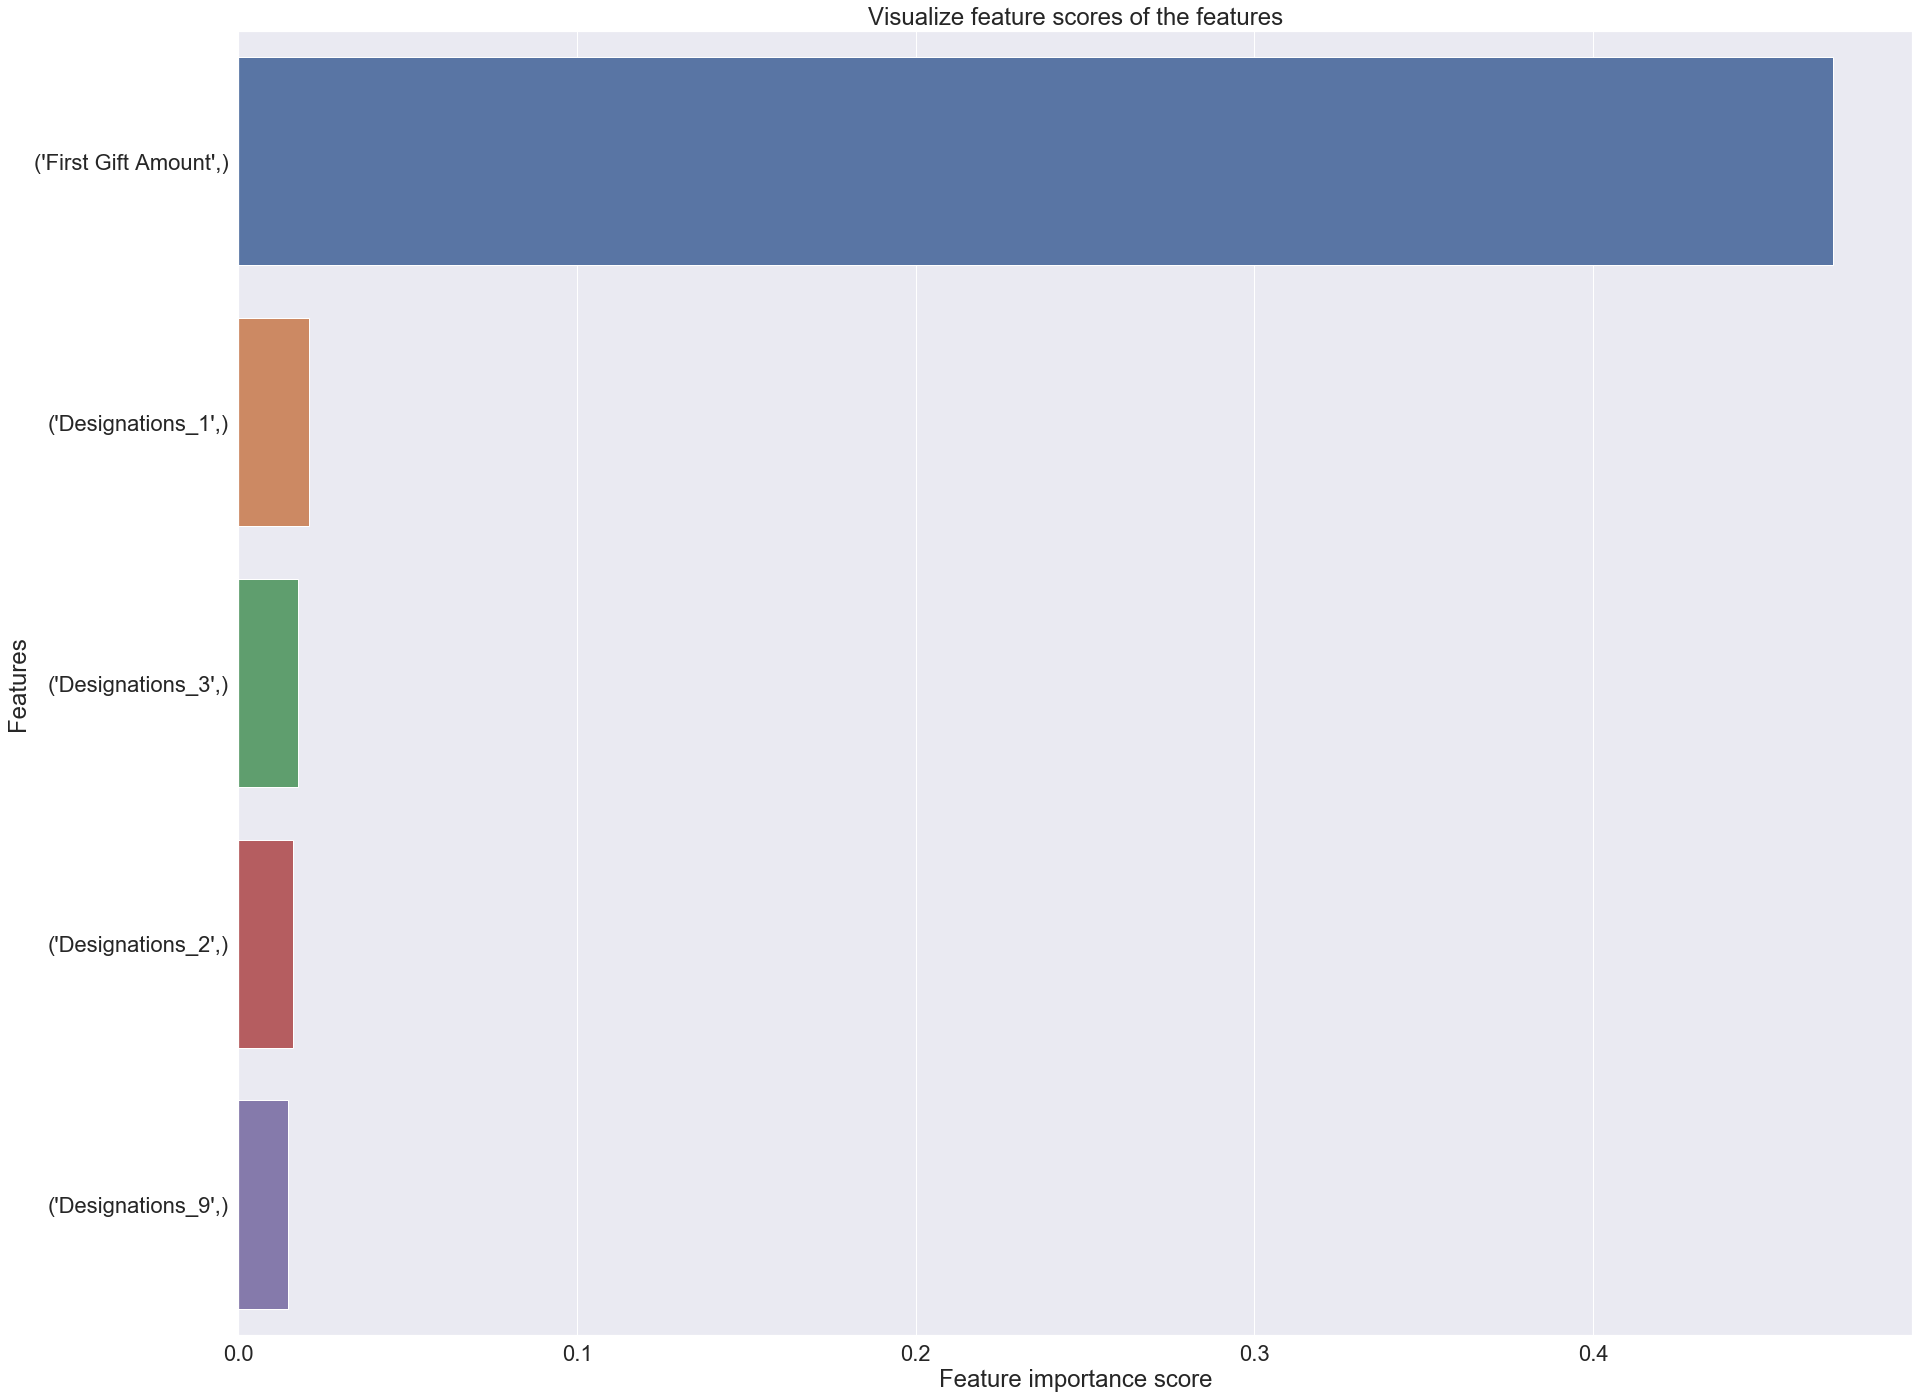

In [448]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:5], y=feature_scores.index[:5], data=dfmodel)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## log reg

In [453]:
from sklearn.linear_model import LogisticRegression

In [454]:
log_model = LogisticRegression().fit(x_train, y_train)
log_pred = log_model.predict(x_test)
print("logreg Model Accuracy:", accuracy_score(y_test, log_pred))

logreg Model Accuracy: 0.8719043552519214


In [455]:
# compute ROC AUC
# store the predicted probabilities for class 1 
y_predlog = log_model.predict_proba(x_test)[:, 1]

In [456]:
y_predlog

array([0.89053622, 0.9103597 , 0.82802459, ..., 0.93597823, 0.73675042,
       0.80291039])

In [457]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predlog)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6646


In [458]:
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6090


In [459]:
ROC_AUC = roc_auc_score(y_test, svmy_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


In [460]:

ROC_AUC = roc_auc_score(y_test, ady_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


In [461]:

ROC_AUC = roc_auc_score(y_test, rfy_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6207


In [ ]:
RF